In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import h5py
import pandas as pd
import visualizing_funcs as vf
import calculations as calc
import loading_data as ld
from settings import *

In [2]:
##Define files
filename0=data_files_path + "/3D_temperature_9_dist_bins_nside_128.hdf5"
filename1=data_files_path + "/3D_temperature_17_dist_bins_nside_128.hdf5"


In [3]:
##Load temperature map

#data_dict0=ld.load_just_temperature_data(filename0) #Not needed for this project but likely in the future
data_dict1=ld.load_just_temperature_data(filename1)

In [4]:
##Define Nside and Npix
Nside = 128 ##based on dust map
Npix = hp.nside2npix(Nside)

### Get Positions for YSOs and SFCs (SF Tracers)

Using the function get_tracer_positions, you will get the longitude and latitude of the tracers. If the objects have a distance, the function will also output the distance. 

These objects are then assigned to a specific distance slice

In [6]:
##Get positions of the YSOs
#This is for all YSOs in the catalog
YSOs = pd.read_csv(csv_files_path + "/SPICY_YSOs_new.csv")
l_ysos, b_ysos = ld.get_tracer_positions(YSOs)

#Only the YSOs with distance
YSOs_with_dist = pd.read_csv(csv_files_path + "/YSOs_withdist.csv")
l_ysos_wdist, b_ysos_wdist, dist_ysos = ld.get_tracer_positions(YSOs_with_dist)
#Get distances slices for YSOs
#l_ysos_sliced0, b_ysos_sliced0 = assign_distance_slice(data_dict0, l_ysos_wdist, b_ysos_wdist, dist_ysos)
l_ysos_sliced, b_ysos_sliced = calc.assign_distance_slice(data_dict1, l_ysos_wdist, b_ysos_wdist, dist_ysos)

No distance measurement
1080 objects had distances out of range


In [8]:
##Get positions for Winston YSOs
winston_ysos = pd.read_csv(csv_files_path + "/Winston_YSOs_new.csv")

l_winston_ysos, b_winston_ysos = ld.get_tracer_positions(winston_ysos)
##Have to remove indices with NaN values
valid_indices = ~np.isnan(l_winston_ysos) & ~np.isnan(b_winston_ysos)
l_winston_ysos = l_winston_ysos[valid_indices]
b_winston_ysos = b_winston_ysos[valid_indices]

No distance measurement


In [9]:
##Get positions of all KYSOs

kyso = pd.read_csv(csv_files_path + "/KYSO.csv")

l_kyso, b_kyso = ld.get_tracer_positions(kyso)

##Get positions for KYSOs with distance

kyso_withdist = pd.read_csv(csv_files_path + "/KYSO_withdist.csv")

l_kyso_wdist, b_kyso_wdist, dist_kyso = ld.get_tracer_positions(kyso_withdist)
l_kyso_sliced, b_kyso_sliced = calc.assign_distance_slice(data_dict1, l_kyso_wdist, b_kyso_wdist, dist_kyso) 

No distance measurement
35 objects had distances out of range


In [14]:
##Get positions of the SFCs
linetoskip = [5, 7, 9, 12, 15, 23, 35, 36, 39] ##skipping lines that have two distances

SFCs = pd.read_csv(csv_files_path + "/SFC_Regions.csv", skiprows = linetoskip) ##read file, skipping lines

l_sfc, b_sfc, dist_sfc = ld.get_tracer_positions(SFCs) ##get latitude, longitude and distance

#l_sfc_sliced0, b_sfc_sliced0 = assign_distance_slice(data_dict0, l_sfc, b_sfc, dist_sfc) 
l_sfc_sliced, b_sfc_sliced = calc.assign_distance_slice(data_dict1, l_sfc, b_sfc, dist_sfc) ## get positions at different distances

2 objects had distances out of range


In [15]:
#Get positions for Lee SFCs

Lee_SFCs = pd.read_csv(csv_files_path + "/Lee_SFCs.csv")
l_lee, b_lee, dist_lee = ld.get_tracer_positions(Lee_SFCs)

#l_lee_sliced0, b_lee_sliced0 = assign_distance_slice(data_dict0, l_lee, b_lee, dist_lee) 
l_lee_sliced, b_lee_sliced = calc.assign_distance_slice(data_dict1, l_lee, b_lee, dist_lee) 

3 objects had distances out of range


In [16]:
#Look at star formation regions that we know in our solar neighbourhood
MolecClouds = pd.read_csv(csv_files_path + "/SFR_SolarNeighbourhood.csv")

l_clouds, b_clouds, dist_clouds = ld.get_tracer_positions(MolecClouds)

dist_clouds = dist_clouds/1000 ## have to convert to kpc

l_clouds_sliced, b_clouds_sliced = calc.assign_distance_slice(data_dict1, l_clouds, b_clouds, dist_clouds) 

0 objects had distances out of range


Now we can plot all the tracers on the same mollview map, this way we can see which area of the sky is covered. YSOs are shown as stars, SFCs as circles, and LMCs as squares. 

0.0 180.0 -180.0 180.0


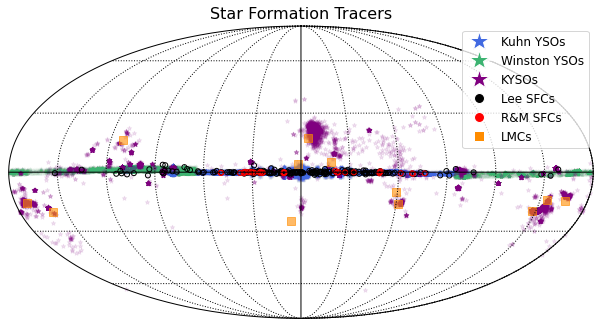

In [26]:
##Plot star formation tracers in sky on their own (not sliced yet)
hp.mollview(title = 'Star Formation Tracers') #Create empty map
hp.projscatter(l_ysos, b_ysos, lonlat=True, marker = '*', s=10, alpha=0.01, color='royalblue')
hp.projscatter(l_winston_ysos, b_winston_ysos, lonlat=True,  marker = '*', s=10, alpha=0.01, color='mediumseagreen')
hp.projscatter(l_kyso, b_kyso, lonlat=True, marker = '*', s=20, alpha=0.1, color='purple')
hp.projscatter(l_lee, b_lee, lonlat=True, marker = '.', facecolor='none', s=100, color='black')
hp.projscatter(l_sfc, b_sfc, lonlat=True, marker = '.', facecolors='none', s=100, color='red')
hp.projscatter(l_clouds, b_clouds, lonlat=True, marker = 's', s=80, alpha=0.6, color='darkorange')


#Made markers small and transparent for better visualizations, but want them to be normal in legend 
#So make specific handles
tracer_legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='royalblue', markersize=20, label='Kuhn YSOs'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='mediumseagreen', markersize=20, label='Winston YSOs'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='purple', markersize=20, label='KYSOs'),
    plt.Line2D([0], [0], marker='.', color='w', markerfacecolor='black', markersize=20, label='Lee SFCs'),
    plt.Line2D([0], [0], marker='.', color='w', markerfacecolor='red', markersize=20, label='R&M SFCs'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='darkorange', markersize=10, label='LMCs')
]
plt.legend(handles=tracer_legend_elements, loc = 'upper right', fontsize = 12)

#Make rest of adjustments to plots

#plt.savefig('Tracers_all.pdf')
hp.graticule()
plt.title('Star Formation Tracers', fontsize = 16)
plt.show()
plt.close()

Now with the "sliced" tracer objects, we can plot them over the temperature map at each distance slice. This will use a similar method as before. 

In [13]:
##Plot temperature map

#map without ysos overtop. 
#plot_3D_temperature_slice_maps(data_dict1, theta_sfc_sliced, phi_sfc_sliced, theta_ysos_sliced, phi_ysos_sliced)

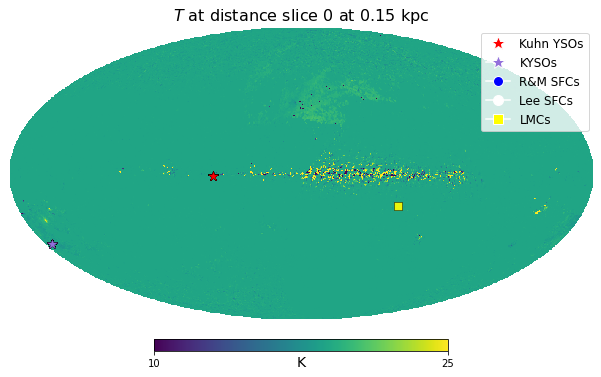

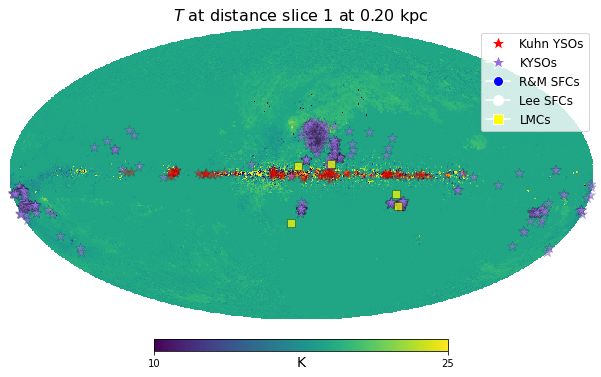

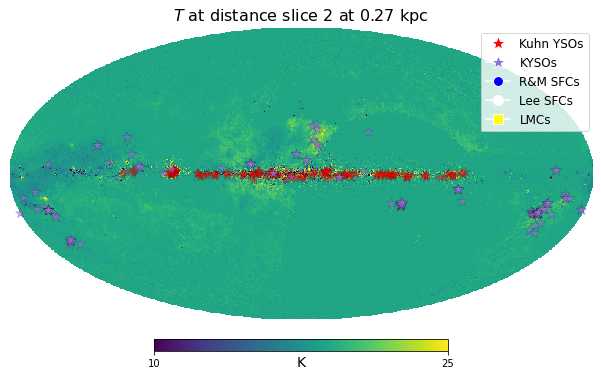

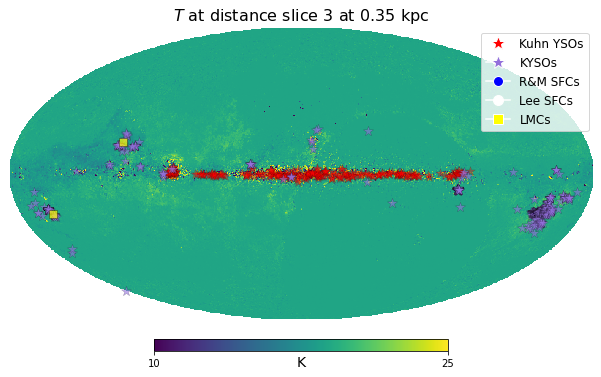

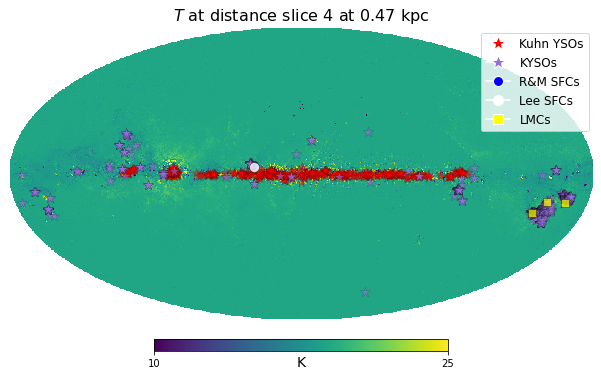

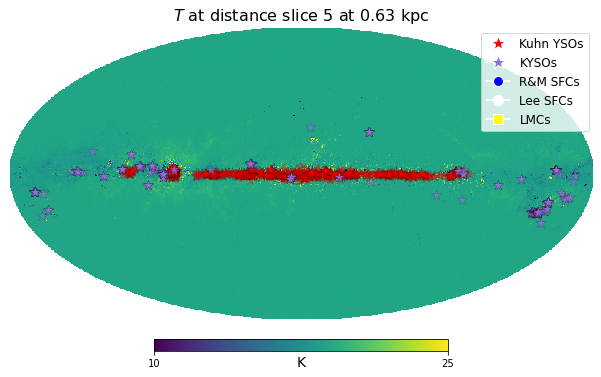

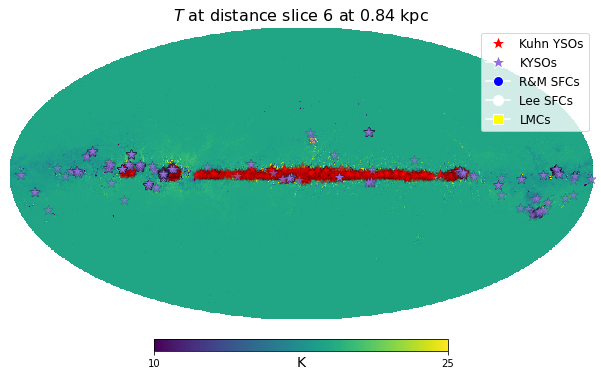

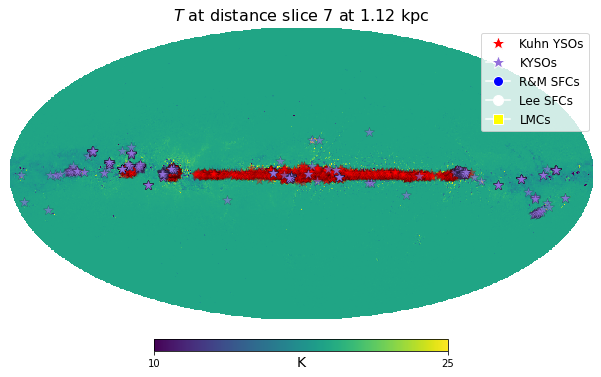

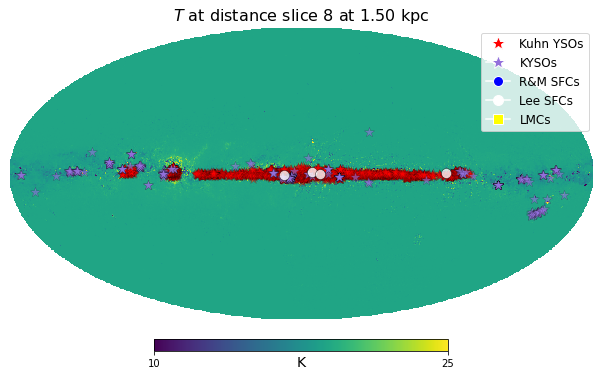

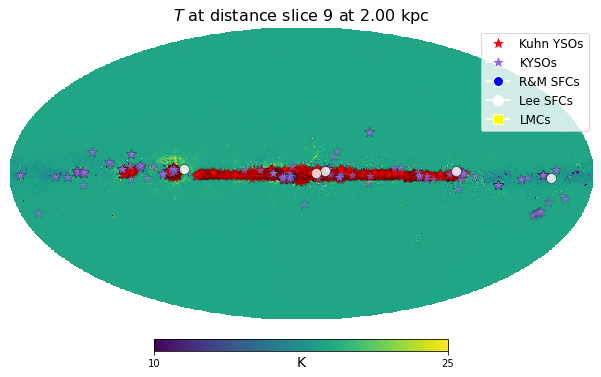

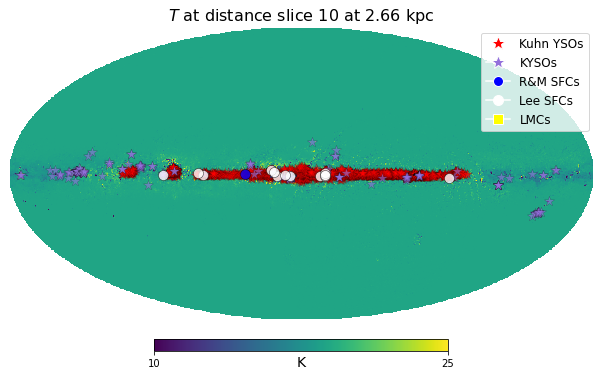

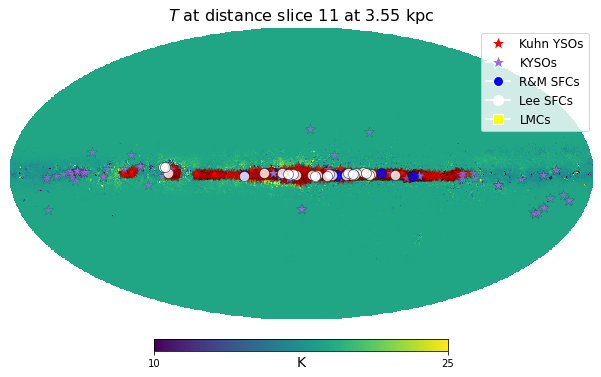

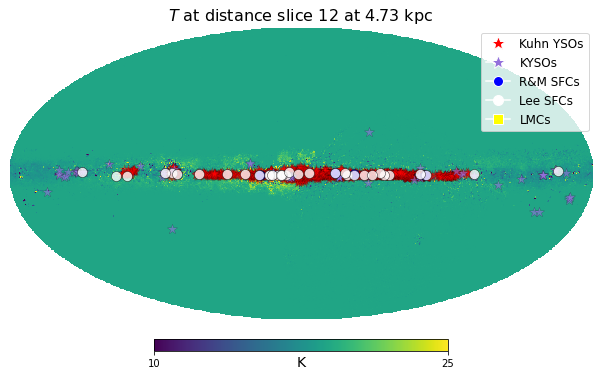

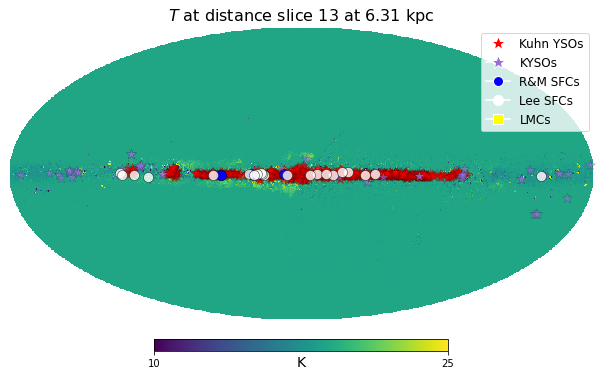

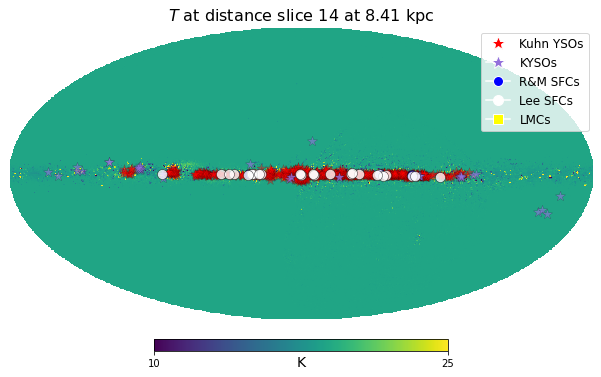

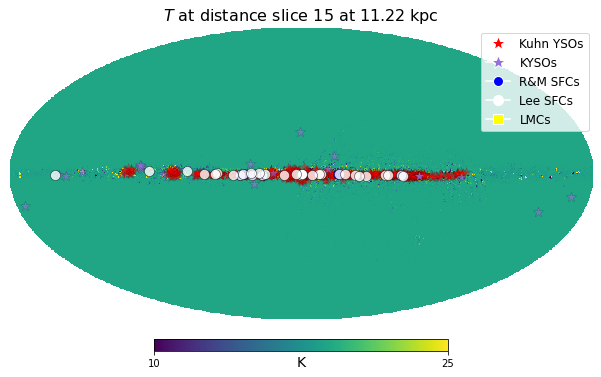

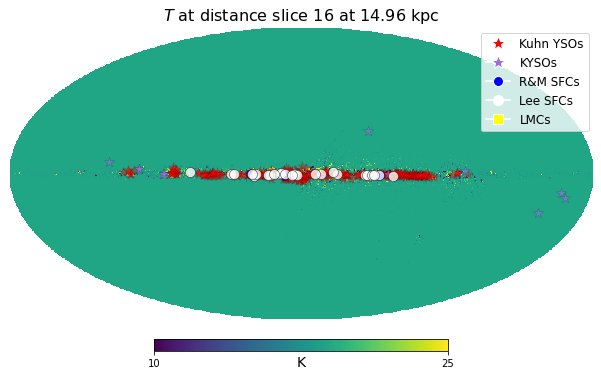

In [28]:
#Define variables
Ts = data_dict1["temperatures"]
model_nslices = data_dict1["nr_of_distance_bins"]
model_dist_slices = data_dict1["distance_slices"]

sliced_legend_elemnents = [
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=15, label='Kuhn YSOs'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='mediumpurple', markersize=15, label='KYSOs'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='R&M SFCs'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Lee SFCs'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, label='LMCs')
]

#Plot maps
for ds_index in range(model_nslices): 
        Temp_map_title = r"$T$ at distance slice "+str(ds_index) +\
                                   " at "+'{:.2f}'.format(model_dist_slices[ds_index])+" kpc"                                
        hp.mollview(Ts[:,ds_index],title=Temp_map_title, nest=True,min=10,max=25, unit='K')
        hp.projscatter(l_ysos_sliced[ds_index], b_ysos_sliced[ds_index], lonlat=True, marker='*', s=100, color='red', alpha=0.4, edgecolor='black', 
                       linewidth=0.2) #Added plotting positions of sf tracer
        hp.projscatter(l_kyso_sliced[ds_index], b_kyso_sliced[ds_index], lonlat=True, marker='*', s=110, color='mediumpurple', alpha=0.6, 
                       edgecolor='black', linewidth=0.2) 
        hp.projscatter(l_sfc_sliced[ds_index], b_sfc_sliced[ds_index], lonlat = True, s = 100, marker='o', alpha = 0.8, color='blue', 
                       edgecolor='black', linewidth=0.5) 
        hp.projscatter(l_lee_sliced[ds_index], b_lee_sliced[ds_index], lonlat=True, s = 100, marker='o', alpha = 0.8, color='white', 
                       edgecolor='black', linewidth=0.5) #Added plotting positions of sf tracer
        hp.projscatter(l_clouds_sliced[ds_index], b_clouds_sliced[ds_index], lonlat=True, s = 80, marker='s', alpha = 0.7, color='yellow', 
                       edgecolor='black', linewidth=0.5)
        
        plt.legend(handles=sliced_legend_elemnents, loc = 'upper right', fontsize = 12)
        plt.title(Temp_map_title, fontsize = 16)
        #plt.savefig('tempmap_{}.pdf'.format(ds_index))

Some of the tracer objects are within the declination mask where there is no dust data. In order to not look at objects within that mask, these are removed. I also plotted them again to see the difference. 

remove_tracers_in_mask calculates the declination of each object using PyEphem, and then creates a new array without them. 

In [30]:
#Filter objects
l_ysos_filtered, b_ysos_filtered = calc.remove_tracers_in_mask(l_ysos_sliced, b_ysos_sliced, model_nslices)
l_kyso_filtered, b_kyso_filtered = calc.remove_tracers_in_mask(l_kyso_sliced, b_kyso_sliced, model_nslices)
l_sfc_filtered, b_sfc_filtered = calc.remove_tracers_in_mask(l_sfc_sliced, b_sfc_sliced, model_nslices)
l_lee_filtered, b_lee_filtered = calc.remove_tracers_in_mask(l_lee_sliced, b_lee_sliced, model_nslices)

#Note that I did not remove the LMCs, wanted to see which ones we cannot see. 

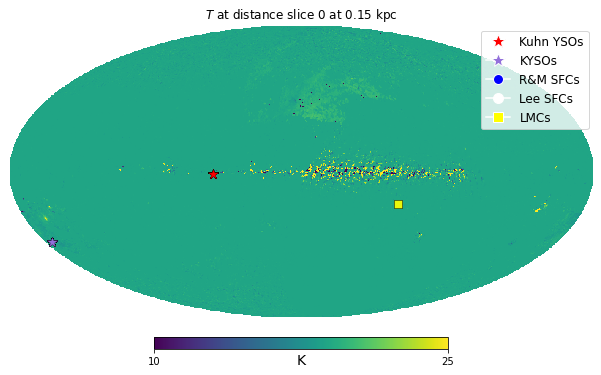

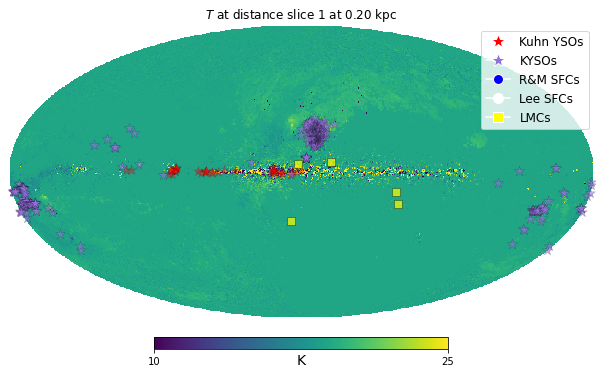

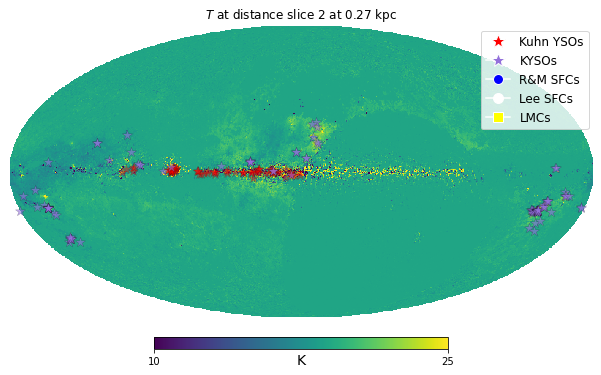

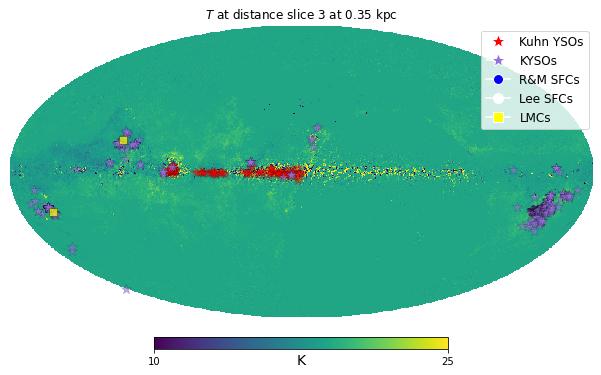

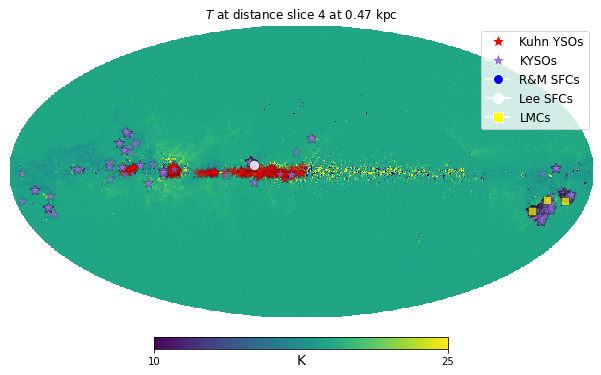

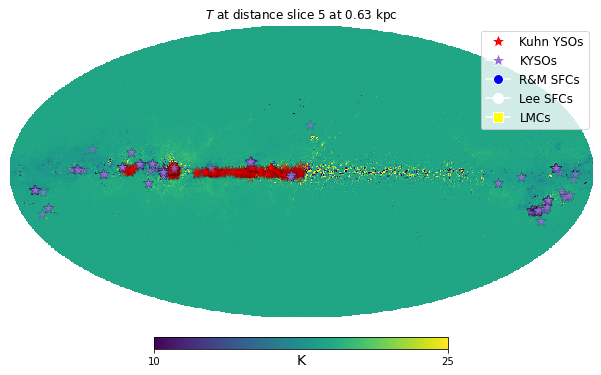

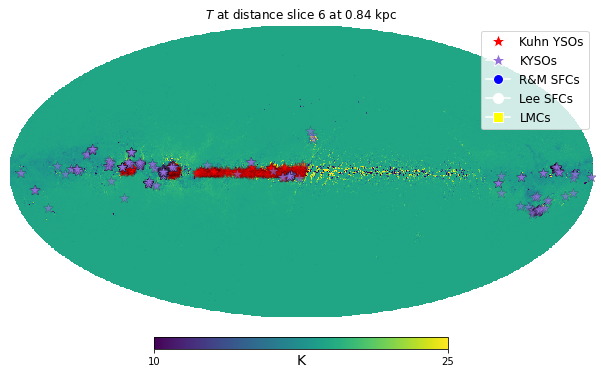

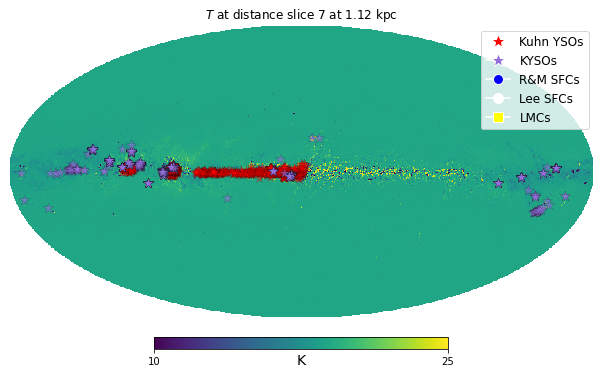

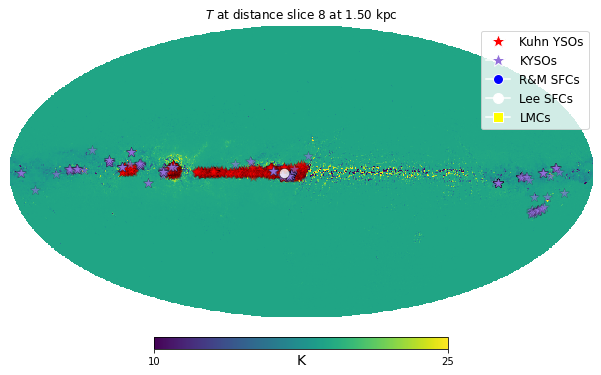

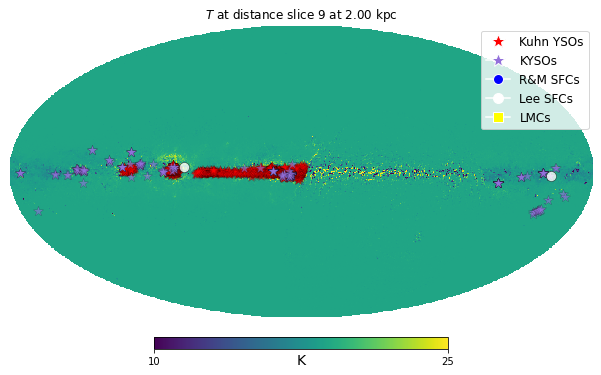

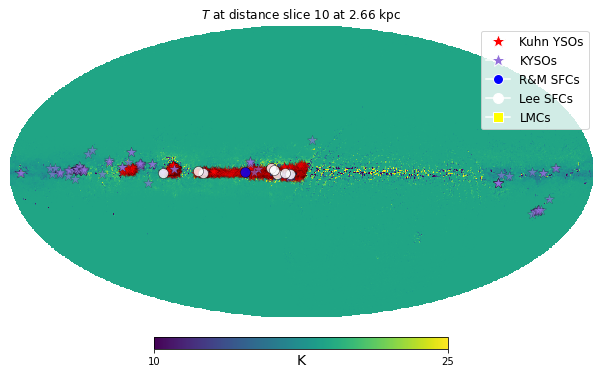

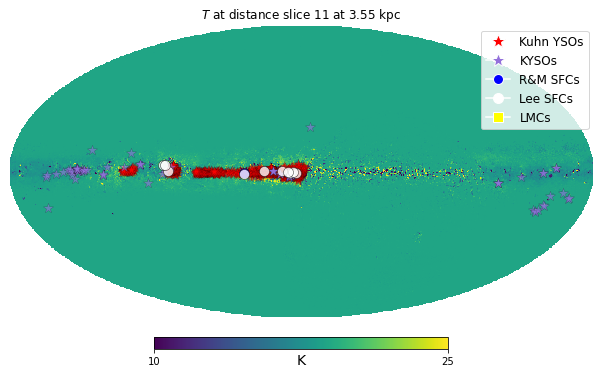

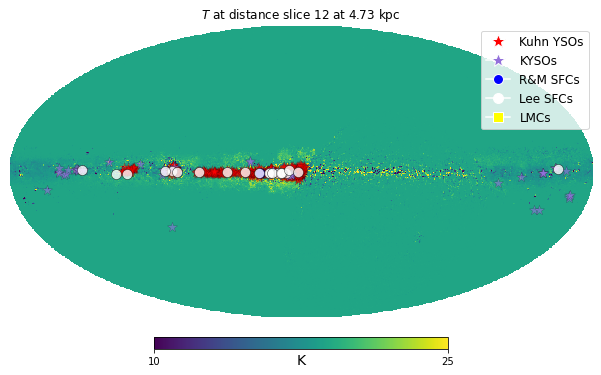

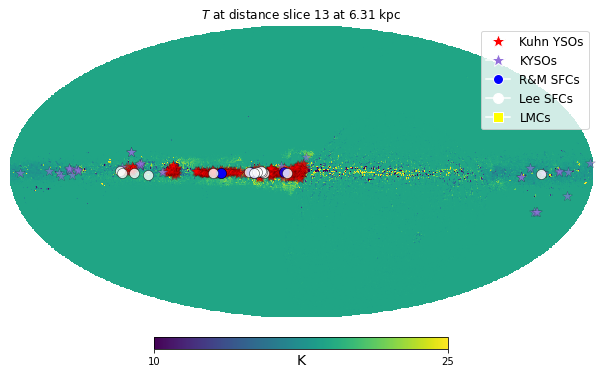

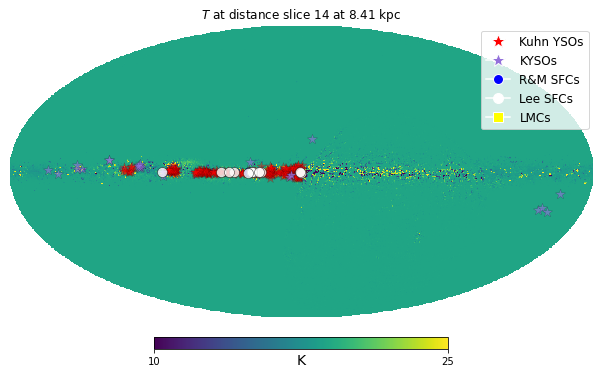

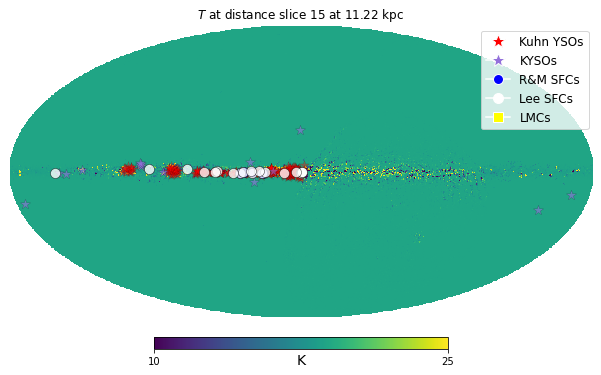

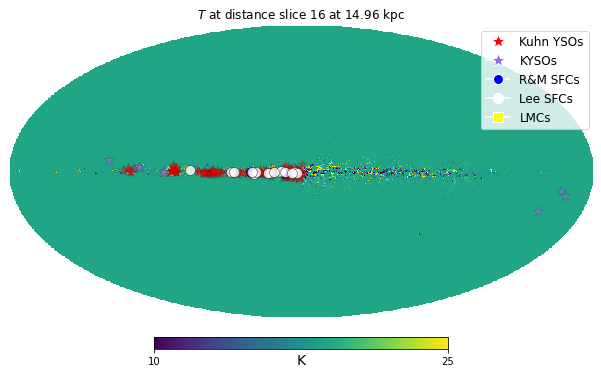

In [31]:
for ds_index in range(model_nslices):
    Temp_map_title = r"$T$ at distance slice "+str(ds_index) +\
                                   " at "+'{:.2f}'.format(model_dist_slices[ds_index])+" kpc"    
    hp.mollview(Ts[:,ds_index],title=Temp_map_title,nest=True,min=10,max=25, unit='K')
    hp.projscatter(l_ysos_filtered[ds_index], b_ysos_filtered[ds_index], lonlat=True, marker='*', s=100, color='red', alpha=0.4, 
                   edgecolor='black', linewidth=0.2) #Added plotting positions of sf tracer
    hp.projscatter(l_kyso_filtered[ds_index], b_kyso_filtered[ds_index], lonlat=True, marker='*', s=110, color='mediumpurple', alpha=0.6, 
                   edgecolor='black', linewidth=0.2)
    hp.projscatter(l_sfc_filtered[ds_index], b_sfc_filtered[ds_index], lonlat = True, s = 100, marker='o', alpha = 0.8, color='blue', 
                   edgecolor='black', linewidth=0.5)
    hp.projscatter(l_lee_filtered[ds_index], b_lee_filtered[ds_index], lonlat=True, s = 100, marker='o', alpha = 0.8, color='white', 
                   edgecolor='black', linewidth=0.5) #Added plotting positions of sf tracer
    hp.projscatter(l_clouds_sliced[ds_index], b_clouds_sliced[ds_index], lonlat=True, s = 80, marker='s', alpha = 0.7, color='yellow', 
                   edgecolor='black', linewidth=0.5)
    plt.legend(handles=sliced_legend_elemnents, loc = 'upper right', fontsize = 12)
    plt.show()



In [20]:
#Plot temperature map with mask

# for ds_index in range(model_nslices):
#     vf.plot_healpix_mollview(Ts[:,ds_index], Nside, np.arange(Npix), Npix, title=r"$T$ at distance slice "+str(ds_index) +\
#                                    " at "+'{:.2f}'.format(model_dist_slices[ds_index])+" kpc",min=10,max=25, unit='K',declination_mask=True)